In [1076]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import math
import random
import PIL
from skimage import data
from skimage import io
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.util.shape import view_as_windows


In [1077]:
def linear_prediction(X_l, w):
    return np.dot(X_l,w)

In [1078]:
def stochastic_gradient_step(X_l, y_l, w, train_ind, eta=0.01):
    N=  X_l.shape[0]
    x = X_l[train_ind]
    y_preds = linear_prediction(x,w)
    err = y_preds - y_l[train_ind]
    return  w -  2.0*eta/N*x*err

In [1079]:
dense1 = np.random.uniform(low=0, high=1, size=(50, 30))

In [1080]:
dense1

array([[0.34974446, 0.70195972, 0.53514526, ..., 0.08928119, 0.9995337 ,
        0.45312309],
       [0.40081444, 0.33879414, 0.98406705, ..., 0.17386759, 0.88716775,
        0.51092615],
       [0.24555767, 0.51037118, 0.45080051, ..., 0.81410413, 0.62686218,
        0.45724526],
       ...,
       [0.6621872 , 0.41712556, 0.69921217, ..., 0.25708363, 0.96733472,
        0.43533891],
       [0.68269352, 0.47566535, 0.06260709, ..., 0.18558015, 0.35518337,
        0.41103597],
       [0.63020963, 0.69973405, 0.27947633, ..., 0.50011146, 0.28247692,
        0.77862189]])

In [1081]:
dense2 = np.random.uniform(low=0, high=1, size=(30, 4))

In [1082]:
dense2

array([[0.28780063, 0.17488482, 0.87165745, 0.64229116],
       [0.16847895, 0.72545989, 0.93020509, 0.83728717],
       [0.56859838, 0.81454122, 0.32790386, 0.93738825],
       [0.41483449, 0.29877011, 0.65448274, 0.16853814],
       [0.85466368, 0.02353607, 0.90394833, 0.96570598],
       [0.60715616, 0.39785853, 0.58524202, 0.57532566],
       [0.67932916, 0.89774141, 0.71873982, 0.71687452],
       [0.64469572, 0.55517148, 0.86266877, 0.70915817],
       [0.32465459, 0.03223473, 0.52701925, 0.28762072],
       [0.3740808 , 0.09830517, 0.24507985, 0.42108153],
       [0.4319301 , 0.11153058, 0.35851091, 0.92108643],
       [0.31529453, 0.99156599, 0.30527117, 0.87245344],
       [0.43556683, 0.6324905 , 0.17645452, 0.16987242],
       [0.51201027, 0.905294  , 0.14865655, 0.29871147],
       [0.72143402, 0.10464087, 0.4612847 , 0.60098602],
       [0.76943006, 0.22627686, 0.74319463, 0.05518476],
       [0.2317403 , 0.39521621, 0.02797916, 0.29270701],
       [0.64438821, 0.07458444,

In [1083]:
dense3 = np.random.uniform(low=0, high=1, size=(4, 4))

In [1084]:
X = np.random.uniform(low=0, high=1, size=(1, 50))

In [1085]:
l0 = 1 / (1 + np.exp(-(X.dot(dense1))))

In [1086]:
l1= 1 / (1 + np.exp(-(l0.dot(dense2))))

In [1087]:
l2 = 1 / (1 + np.exp(-(l1.dot(dense3))))

In [1088]:
l2

array([[0.94180963, 0.95398863, 0.83107117, 0.88619432]])

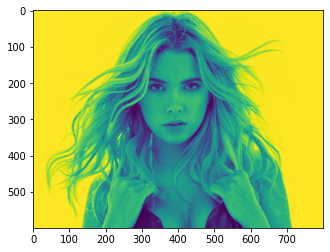

In [1089]:
image = io.imread('foto_l.jpg',as_gray=True)
#image  = color.rgb2gray(image)
plt.imshow(image)


In [1090]:
image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [1091]:
window_shape = (7, 7)
set = view_as_windows(image, window_shape)

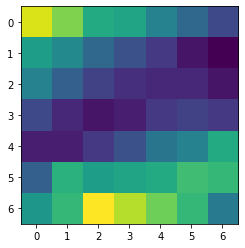

In [1092]:
plt.imshow(set[200,200])

In [ ]:
for  i in range(set.shape[0]):
    for j in range(set.shape[1]):
        print(i)
        block = set[i,j].reshape(1,49)
        block = np.append(block,1)
